In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_swiss_roll

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap

import timeit

import matplotlib.gridspec as gridspec

In [37]:
X, y = make_swiss_roll(n_samples=2000, random_state=1111)

In [38]:
X.shape

(2000, 3)

In [39]:
X[:, 2] = 0.5*X[:, 2]

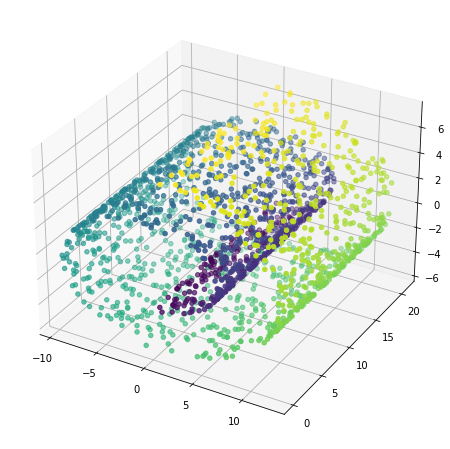

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y);

In [51]:
running_time = []

# PCA
start = timeit.default_timer()
X_2d_pca = PCA(n_components=2).fit_transform(X)
stop = timeit.default_timer()
running_time.append(stop - start) 

# MDS
start = timeit.default_timer()
X_2d_mds = MDS(n_components=2).fit_transform(X)
stop = timeit.default_timer()
running_time.append(stop - start) 

# Isomap
start = timeit.default_timer()
X_2d_iso = Isomap(n_neighbors=5, n_components=2).fit_transform(X)
stop = timeit.default_timer()
running_time.append(stop - start) 

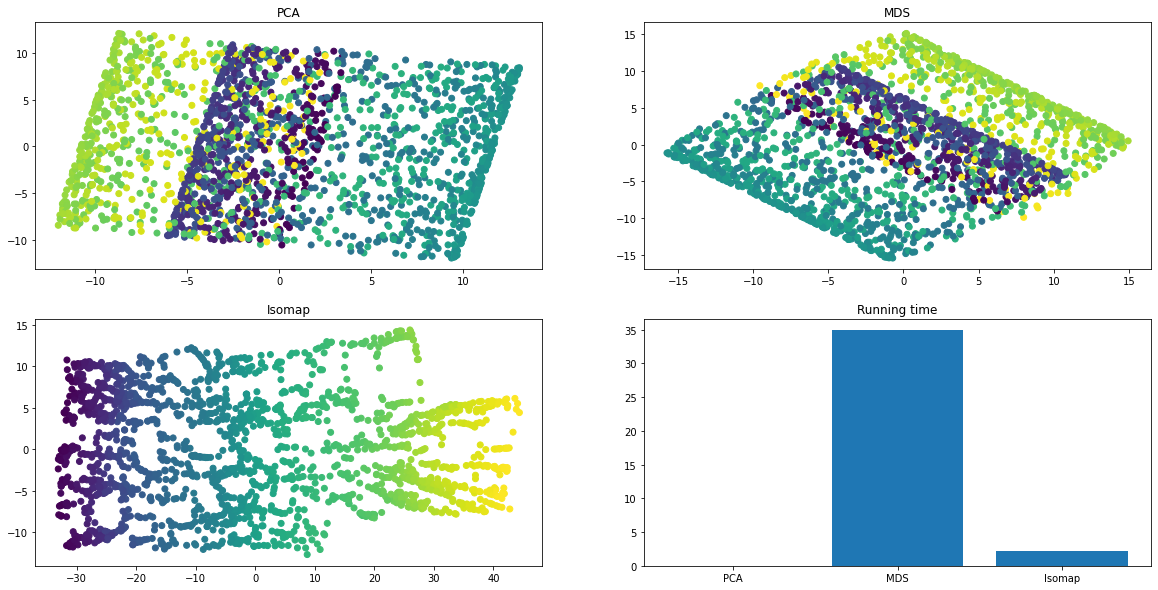

In [58]:
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
plt.scatter(X_2d_pca[:, 0], X_2d_pca[:, 1], c=y);
plt.title('PCA')

ax1 = fig.add_subplot(spec[0, 1])
plt.scatter(X_2d_mds[:, 0], X_2d_mds[:, 1], c=y);
plt.title('MDS')

ax2 = fig.add_subplot(spec[1, 0])
plt.scatter(X_2d_iso[:, 0], X_2d_iso[:, 1], c=y);
plt.title('Isomap')

ax3 = fig.add_subplot(spec[1, 1])
plt.bar(x=['PCA', 'MDS', 'Isomap'], height=running_time);
plt.title('Running time');

In [61]:
import os
from skimage.io import imread
from skimage.color import rgb2gray

In [62]:
sm_path = '_data/smile/smile/'
ns_path = '_data/smile/non_smile/'
sm_file_list = os.listdir(sm_path)
ns_file_list = os.listdir(ns_path)

print('There are {} smile data and {} non smile data!'.format(len(sm_file_list), len(ns_file_list)))

There are 600 smile data and 603 non smile data!


In [63]:
X_smile = np.empty((len(sm_file_list), 64*64))

indx = 0
for f in sm_file_list:
    img = imread(os.path.join(sm_path, f))
    X_smile[indx, :] = rgb2gray(img).flatten()
    indx += 1
    
y_smile = ['smile']*len(sm_file_list)
    
    
X_non_smile = np.empty((len(ns_file_list), 64*64))

indx = 0
for f in ns_file_list:
    img = imread(os.path.join(ns_path, f))
    X_non_smile[indx, :] = rgb2gray(img).flatten()
    indx += 1
    
y_non_smile = ['non_smile']*len(ns_file_list)

X = np.concatenate([X_smile, X_non_smile])
y = np.asarray(y_smile + y_non_smile)

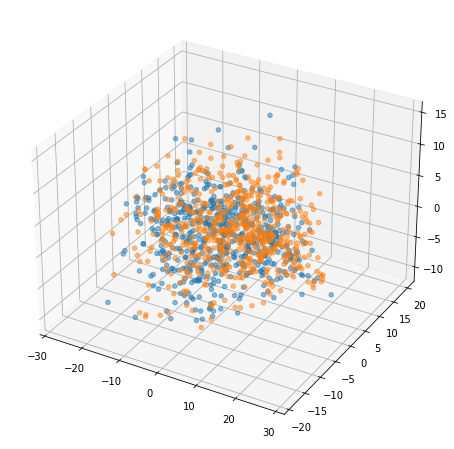

In [81]:
X_iso_smile = Isomap(n_neighbors=30, n_components=3).fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X_iso_smile[y=='smile', 0], X_iso_smile[y=='smile', 1], X_iso_smile[y=='smile', 2], alpha=0.5)
ax.scatter3D(X_iso_smile[y=='non_smile', 0], X_iso_smile[y=='non_smile', 1], X_iso_smile[y=='non_smile', 2], alpha=0.5)

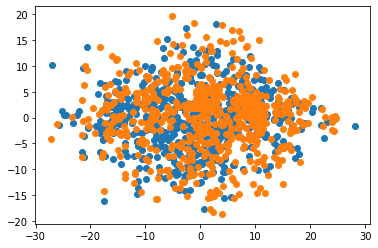

In [82]:
plt.scatter(X_iso_smile[y=='smile', 0], X_iso_smile[y=='smile', 1])
plt.scatter(X_iso_smile[y=='non_smile', 0], X_iso_smile[y=='non_smile', 1],)

In [83]:
from sklearn.datasets import load_digits

In [84]:
digits = load_digits()

In [85]:
X = digits['data']
y = digits['target']

In [86]:
X.shape

(1797, 64)

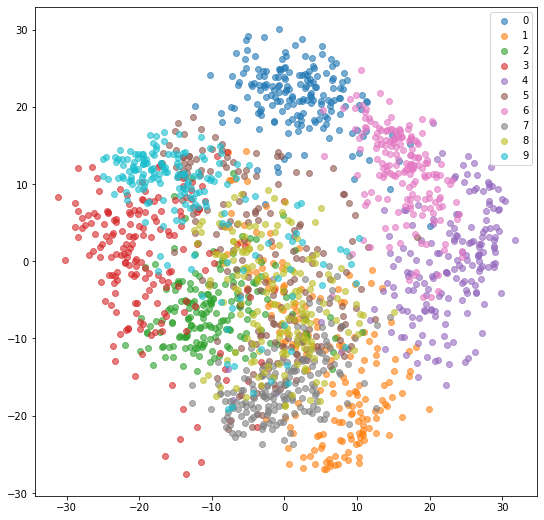

In [99]:
X_pca_digits = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(9, 9))

plt.scatter(X_pca_digits[y==0, 0], X_pca_digits[y==0, 1], label='0', alpha=0.6);
plt.scatter(X_pca_digits[y==1, 0], X_pca_digits[y==1, 1], label='1', alpha=0.6);
plt.scatter(X_pca_digits[y==2, 0], X_pca_digits[y==2, 1], label='2', alpha=0.6);
plt.scatter(X_pca_digits[y==3, 0], X_pca_digits[y==3, 1], label='3', alpha=0.6);
plt.scatter(X_pca_digits[y==4, 0], X_pca_digits[y==4, 1], label='4', alpha=0.6);
plt.scatter(X_pca_digits[y==5, 0], X_pca_digits[y==5, 1], label='5', alpha=0.6);
plt.scatter(X_pca_digits[y==6, 0], X_pca_digits[y==6, 1], label='6', alpha=0.6);
plt.scatter(X_pca_digits[y==7, 0], X_pca_digits[y==7, 1], label='7', alpha=0.6);
plt.scatter(X_pca_digits[y==8, 0], X_pca_digits[y==8, 1], label='8', alpha=0.6);
plt.scatter(X_pca_digits[y==9, 0], X_pca_digits[y==9, 1], label='9', alpha=0.6);

plt.legend();

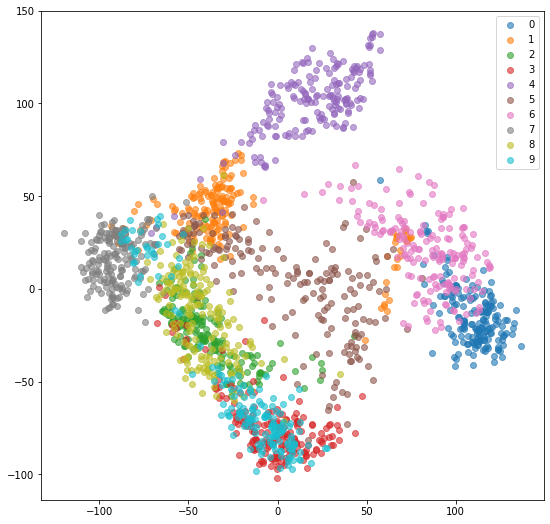

In [109]:
X_iso_digits = Isomap(n_neighbors=9, n_components=2).fit_transform(X)

plt.figure(figsize=(9, 9))

plt.scatter(X_iso_digits[y==0, 0], X_iso_digits[y==0, 1], label='0', alpha=0.6);
plt.scatter(X_iso_digits[y==1, 0], X_iso_digits[y==1, 1], label='1', alpha=0.6);
plt.scatter(X_iso_digits[y==2, 0], X_iso_digits[y==2, 1], label='2', alpha=0.6);
plt.scatter(X_iso_digits[y==3, 0], X_iso_digits[y==3, 1], label='3', alpha=0.6);
plt.scatter(X_iso_digits[y==4, 0], X_iso_digits[y==4, 1], label='4', alpha=0.6);
plt.scatter(X_iso_digits[y==5, 0], X_iso_digits[y==5, 1], label='5', alpha=0.6);
plt.scatter(X_iso_digits[y==6, 0], X_iso_digits[y==6, 1], label='6', alpha=0.6);
plt.scatter(X_iso_digits[y==7, 0], X_iso_digits[y==7, 1], label='7', alpha=0.6);
plt.scatter(X_iso_digits[y==8, 0], X_iso_digits[y==8, 1], label='8', alpha=0.6);
plt.scatter(X_iso_digits[y==9, 0], X_iso_digits[y==9, 1], label='9', alpha=0.6);

plt.legend();

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [129]:
# steps = [('dimension reduction', Isomap(n_neighbors=9, n_components=15)),
#          ('classifier', RFC(n_estimators=20))]

# steps = [('dimension reduction', PCA(n_components=13)),
#          ('classifier', ABC(base_estimator=DTC(), n_estimators=20))]

steps = [('dimension reduction', Isomap(n_neighbors=9, n_components=13)),
         ('classifier', ABC(base_estimator=DTC(), n_estimators=20))]

clf = Pipeline(steps=steps)
clf.fit(X_train, y_train)

print(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.9109697933227345
